# Last FM API (Music)

Spotify's API is dead to us, so we're using Last.fm's - it's still music, just not as nice of an API.

1. Create an account at https://www.last.fm/api/
2. Create an "application" to get a key: https://www.last.fm/api/account/create
    - It isn't a real application, it's just your project
    - Name/description doesn't matter, ignore callback key and callback url
3. And save the API key that shows up on the next screen

You can find documentation at https://www.last.fm/api/

The domain for the API is `http://ws.audioscrobbler.com`, so all of your endpoints will be connected to that. To test your API key, check the following URL in your browser: `http://ws.audioscrobbler.com/2.0/?method=artist.search&artist=cher&api_key=XXXXXXXXXXXXXXXXXXXX&format=json` (change the `XXXXXX` to be your API key, of course!).

> Last.fm used to be called **AudioScrobbler**, which is why its URLs don't have "last.fm" in them.
> While we're asking about URLs, notice that the API endpoints have a lot of `?` and `&` in them - these are key/value pairs, kind of like dictionaries, but for URLs instead of Python.

# FIRST: SETUP

## 1) Import the libraries/packages you might need

We need a library to read in the data for us! We don't like `urllib2`, so it must be something cooler and better.

In [1]:
# Import what you need here
import requests

## 2) Save your API key

Write your API key here so you don't forget it - it's the "api key" one, not the "shared secret" one

In [2]:
#Audioscrobbler URL
base_url = "http://ws.audioscrobbler.com/2.0/"

# User: sunfm9999
# Application-name: s-pinkmartini
# API Key: 94fdb072f1b7c2111c4c64a84cf7e912
api_key = "94fdb072f1b7c2111c4c64a84cf7e912"
# secret key: 2a8eac2bcb93e89db5427f1ae122927e

## 3) A new function! Just run the code below. DO NOT EDIT IT.

After you run this cell, you'll have a new function that you can use to display images.

In [3]:
import urllib
from IPython.display import display, Image
from IPython.core.display import HTML 

def display_image(url):
    response = urllib.request.urlopen(url).read()
    img = Image(response, width=200)
    display(img)

All you need to do to display an image is use `display_image` and send it a string, just like this:

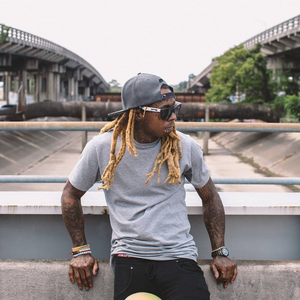

In [4]:
display_image("https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png")

# NOW: YOUR ASSIGNMENT

## 1) Search for and print a list of 50 musicians with `lil` in their name, along with the number of listeners they have

There are a lot of musicians with "Lil" in their name - it used to be all Lil Wayne and Lil Kim, but we live in a new world now!

- *Tip: Remember, the domain for the API is `http://ws.audioscrobbler.com`*
- *Tip: Make sure you ask the API for 50 musicians! This involves adding another parameter to the URL - notice they all have a `&` before them. [Read the documentation](http://www.last.fm/api/show/artist.search) to find the parameter's name.* 
- *Tip: When you are looking at any piece of data - is it a dictionary? Look at the keys! Is it a list? Look at the first element!*
- *Tip: LOOK AT THE KEYS. and then the other keys and the other keys and the other keys. It's an ugly series of dictionaries!*

First, we build a function that will construct us an URL with a couple of GET parameters - just for readability later

In [5]:
def make_url(base_url = "", params = {}):
    url_string = base_url + "?"
    for key in params.keys():
        url_string += key + "=" + params[key] + "&"
    url_string = url_string[:-1]
    return url_string

Now, we can construct the url, make a first request, put the result in json form and see if that worked

In [6]:
params = {'method': "artist.search", 'artist': "lil", 'limit': "50", 'api_key': api_key, 'format': "json"}
url = make_url(base_url, params)
#print (url) #only to check
response = requests.get(url)
#print (response) #only to check
searchterm_data = response.json()
#print (data) #only to check

Let's analyze what's in the data

In [7]:
print (searchterm_data.keys()) #the datastream contains a dictionary with just one entry, "results"
results = searchterm_data['results'] 
#print (results) #only to explore
print (type(results)) #it's another dictionary
print (results.keys()) #the first three entries are meta entries. the search results are in "artistmatches"
artistmatches = results['artistmatches']
#print (artistmatches) #only to explore
print (type(artistmatches)) #it's another dictionary
print (artistmatches.keys()) #another dictionary in there, called "artist"
artist = artistmatches['artist']
#print (artist) #only to explore
print (type(artist)) #it's a list
#print (artist[0]) #only to explore
print (type(artist[0])) #a dictionary in there
print (artist[0].keys()) #we have the relevant fields here: "name", "listeners"

dict_keys(['results'])
<class 'dict'>
dict_keys(['opensearch:Query', 'opensearch:totalResults', 'opensearch:startIndex', 'opensearch:itemsPerPage', 'artistmatches', '@attr'])
<class 'dict'>
dict_keys(['artist'])
<class 'list'>
<class 'dict'>
dict_keys(['name', 'listeners', 'mbid', 'url', 'streamable', 'image'])


Now we are ready to loop through the artist-list an display the results we are interested in

In [8]:
for this_artist in artist:
    print(this_artist['name'], "has", this_artist['listeners'], "listeners")

Lil' Wayne has 3087004 listeners
Lily Allen has 2074505 listeners
Lil B has 194136 listeners
Lilly Wood & The Prick has 360010 listeners
LIL UZI VERT has 89573 listeners
Lil Ugly Mane has 31969 listeners
Lil Jon has 581632 listeners
Lil' Kim has 431412 listeners
Lil Jon & The East Side Boyz has 486884 listeners
Lil Yachty has 59796 listeners
Lil Boosie has 420364 listeners
Lila Downs has 155363 listeners
Lil Dicky has 79035 listeners
The Tiger Lillies has 106948 listeners
Lil Wyte has 255192 listeners
Birdman & Lil' Wayne has 587423 listeners
Lil' Flip has 324554 listeners
Lily & Madeleine has 111070 listeners
Spangle call Lilli line has 28717 listeners
Lil Durk has 49508 listeners
Lillasyster has 47277 listeners
Lilu has 35891 listeners
Lil' Scrappy has 257908 listeners
Lilys has 54224 listeners
The Lillingtons has 32077 listeners
Leila has 52334 listeners
LIL PEEP has 8983 listeners
Lil Mama has 150550 listeners
Lillix has 99355 listeners
Lily Chou-Chou has 29135 listeners
Liliput ha

Your results should begin something like this:
    
```
Lil' Wayne has 3086628 listeners
Lily Allen has 2074266 listeners
Lil B has 194116 listeners
Lilly Wood & The Prick has 359886 listeners
Lil Ugly Mane has 31955 listeners
LIL UZI VERT has 88517 listeners
```

## 2) How many listeners does your list have in total?

The answer should be roughly **11,500,000**. If it's closer to **10,000,000** make sure you have 50 artists instead of 30 artists.

- *Tip: What's the data type of the `listeners` count? It's going to cause a problem!*
- *Tip: If you were crazy you could use sum and a list comprehension. But you really don't have to!*

In [9]:
#print (type(artist[0]['listeners'])) #for testing
listeners = [int(this_artist['listeners']) for this_artist in artist]

In [10]:
print ("The total number of listeners is:", sum(listeners), ".")

The total number of listeners is: 11512206 .


## 3) Show each artist's name and extra-large image

Because you ran the code in setup, you now have a function called `display_image` that you can use to display an image if you give it a URL as a string. For example, I have this image and want to display it. I just send a string URL to the `display_image` method.

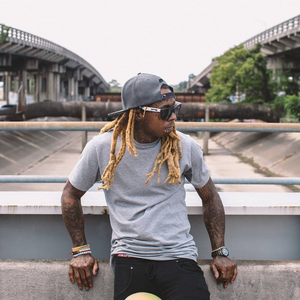

In [11]:
display_image("https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png")

Each artist **has a list of images of different sizes**. We're interested in the second-to-last one, where `size` is `extralarge`. Print their name and use `display_image` to display their extra-large image.

- *Tip: The URL should look like this: `https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png`*
- *Tip: You can always assume it's the second to the last, or assume it's `extralarge`, or whatever you want to do to find it.*
- *Tip: Make sure the URL is correct before you try to display it.*

.... exploring the data

In [12]:
print (type(artist[0]['image'])) #in the "image" key, there is a list
for image in artist[0]['image']:  
    print (image)
#each element has a dictionary in it with "#text" and "size"

<class 'list'>
{'#text': 'https://lastfm-img2.akamaized.net/i/u/34s/0fc7d7a1812dc79e9925d80382cde594.png', 'size': 'small'}
{'#text': 'https://lastfm-img2.akamaized.net/i/u/64s/0fc7d7a1812dc79e9925d80382cde594.png', 'size': 'medium'}
{'#text': 'https://lastfm-img2.akamaized.net/i/u/174s/0fc7d7a1812dc79e9925d80382cde594.png', 'size': 'large'}
{'#text': 'https://lastfm-img2.akamaized.net/i/u/300x300/0fc7d7a1812dc79e9925d80382cde594.png', 'size': 'extralarge'}
{'#text': 'https://lastfm-img2.akamaized.net/i/u/0fc7d7a1812dc79e9925d80382cde594.png', 'size': 'mega'}


Loop through the artists and get the extralarge (second-last) image for each one

A picture of Lil' Wayne


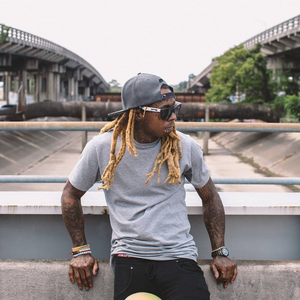

A picture of Lily Allen


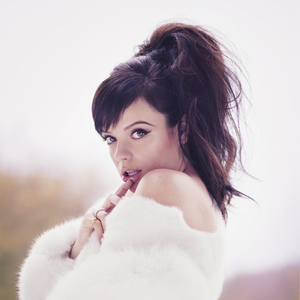

A picture of Lil B


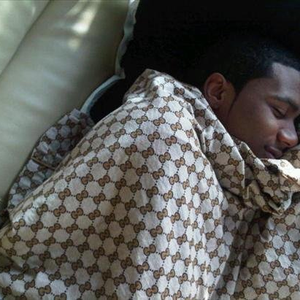

A picture of Lilly Wood & The Prick


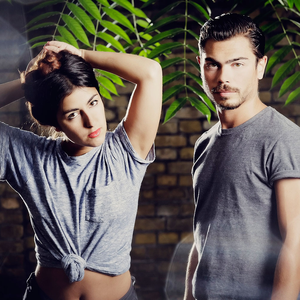

A picture of LIL UZI VERT


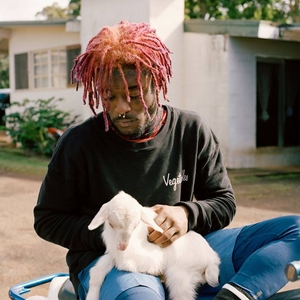

A picture of Lil Ugly Mane


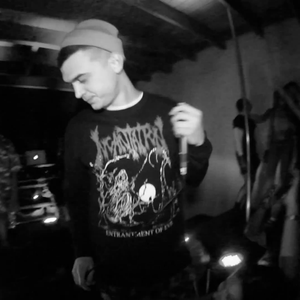

A picture of Lil Jon


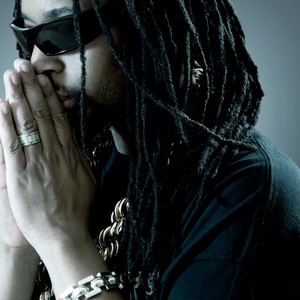

A picture of Lil' Kim


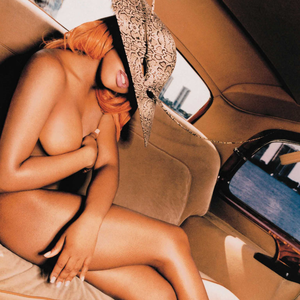

A picture of Lil Jon & The East Side Boyz


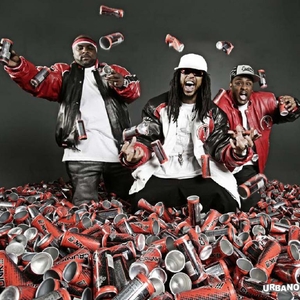

A picture of Lil Yachty


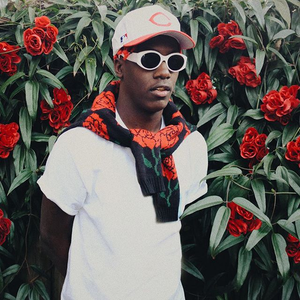

A picture of Lil Boosie


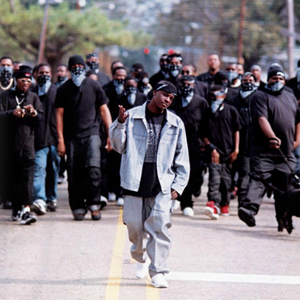

A picture of Lila Downs


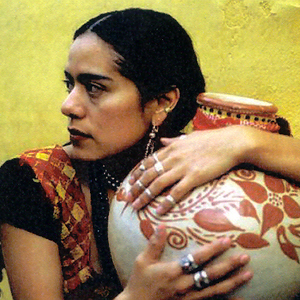

A picture of Lil Dicky


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


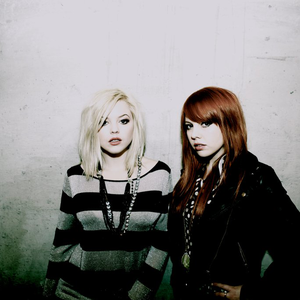

A picture of Lily Chou-Chou


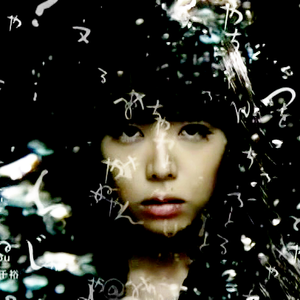

A picture of Liliput


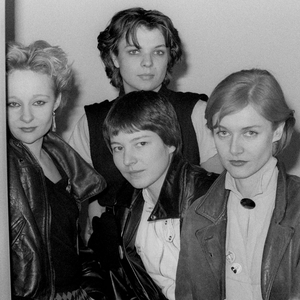

A picture of Lil' Kleine


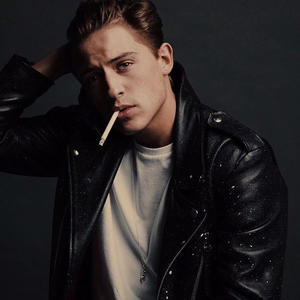

A picture of Amelia Lily


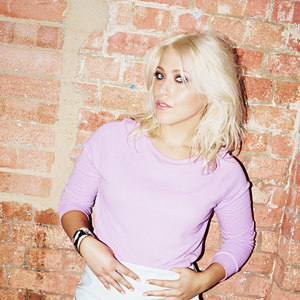

A picture of Mashrou' Leila


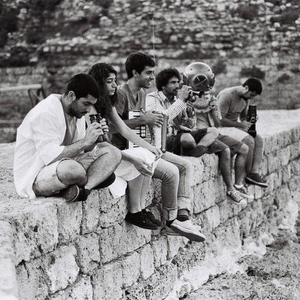

A picture of Lil Twist


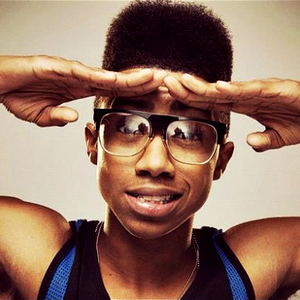

A picture of Lilly Wood & The Prick And Robin Schulz


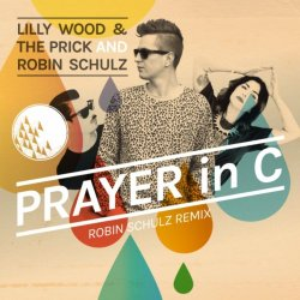

A picture of Lillies and Remains


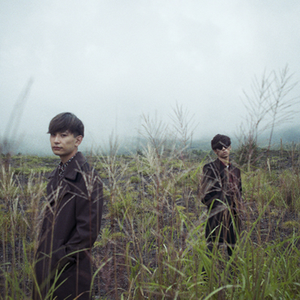

A picture of Lil Rob


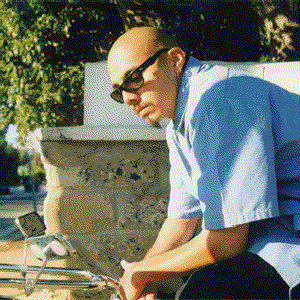

A picture of Lil Silva


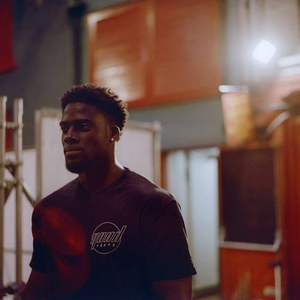

A picture of Lil Scrappy


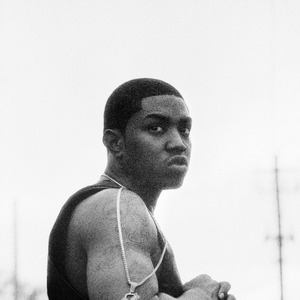

A picture of Lilium


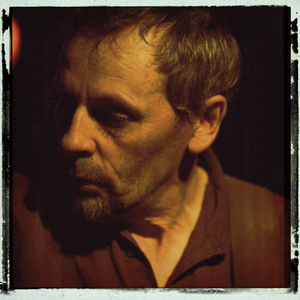

A picture of Lilacs & Champagne


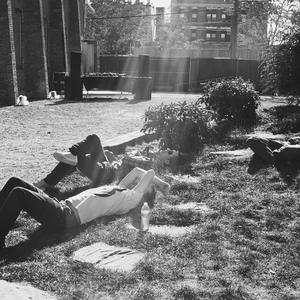

A picture of Lil Debbie


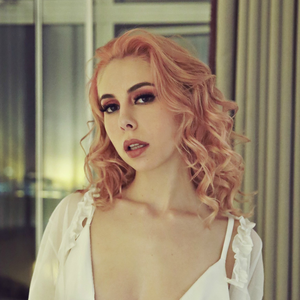

A picture of Lil Herb


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [52]:
for this_artist in artist:
    print (this_artist['name'])
    pic_url = this_artist['image'][3]['#text']
    #print (pic_url) #only for testing
    display_image(pic_url)

## 4) Find Lil Jon's `mbid` (or anyone else's!).

Oftentimes in an API, you can do a few things: you can **search** for items, and you can **see more information** about items. To find more information about the item, you need to use their **unique id**. In this dataset, it's called an `mbid` (MusicBrainz, I think - another company associated with last.fm!).

Go through the artists and print their **name and mbid**. Find Lil Jon's `mbid`. I *wanted* Lil Uzi Vert's, but for some reason it isn't there. Then I wanted us to look at Lily Allen's, but I just couldn't bring myself to do that. If you'd rather do someone else, go for it.

In [13]:
for this_artist in artist:
    if this_artist['name'] == "Lil Jon":
        mbid = this_artist['mbid']
        break
print ("Lil Jon's mbid is:", mbid)

Lil Jon's mbid is: a95384b1-6aec-468c-ae0d-8c6daf87c4c2


## 5) Find the artist's name and bio using their `mbid`.

If you look at the [last.fm documentation](http://www.last.fm/api/show/artist.getInfo), you can see how to use the artist's `mbid` to find more information about them. Print **every tag associated with your artist**.

- *Tip: It's a new request to the API*
- *Tip: Use the `mbid`, and make sure you delete the `&name=Cher` from the sample endpoint*
- *Tip: If you use `print` for the bio it looks a little nicer than it would otherwise*

Construct our new API url

In [14]:
params = {'method': "artist.getinfo", 'mbid': mbid, 'api_key': api_key, 'format': "json"}
url = make_url(base_url, params)

Make the request

In [15]:
response = requests.get(url)
#print (response) #only to check
artist_data = response.json()
#print (data) #only to check

Explore the data

In [16]:
#print (type(artist_data)) #it's a dictionary
#print (artist_data.keys()) #only one key there, "artist"
artist = artist_data['artist']
#print (type(artist)) #it's another dictionary
print (artist.keys()) #The "name" is there, tags, also the "bio"
#for key in artist.keys():
    #print (key, ":", artist[key])
print (type(artist['tags'])) #tags is a dictionary
tags = artist['tags'] 
print (tags.keys()) #there is only one key in "tags": "tag"
#print (tags['tag']) #just to explore
print (type(tags['tag'])) #it's a list that contains style-names
print (tags['tag'][0]['name'])
#print (artist['similar']) #jsut to explore
print (type(artist['similar'])) #it's a dictionary
print (artist['similar'].keys()) #only one entry "artist", probably a list
print (type(artist['similar']['artist'])) #yes a list
similar_artists = artist['similar']['artist']
#print (similar_artists[0]) #just to explore
print (type(similar_artists[0])) #a dictionary
print (similar_artists[0].keys()) #contain stuff like "name" etc.

dict_keys(['name', 'mbid', 'url', 'image', 'streamable', 'ontour', 'stats', 'similar', 'tags', 'bio'])
<class 'dict'>
dict_keys(['tag'])
<class 'list'>
Crunk
<class 'dict'>
dict_keys(['artist'])
<class 'list'>
<class 'dict'>
dict_keys(['name', 'url', 'image'])


We can now display all the information about the artist:

Name: Lil Jon
Url: https://www.last.fm/music/Lil+Jon


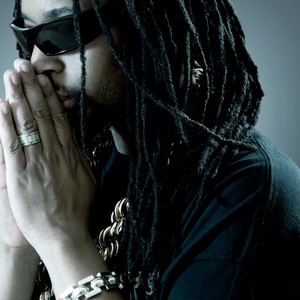

Listeners: 581632
Playcount: 3469164
Similar artists: ['Lil Jon & The East Side Boyz', 'Ying Yang Twins', 'Flo Rida', 'Pitbull', 'YoungBloodz']
Jonathan Mortimer Smith (born January 27, 1971 in Atlanta, Georgia), better known by his stage name Lil Jon, is an American rapper, actor, producer and member of the crunk group Lil Jon & The East Side Boyz. Lil Jon formed the group with friends Big Sam and Lil Bo, and they released five studio albums and have had many hit songs. He's prehaps best known for his iconic single "Get Low", which featured the Ying Yang Twins and reached #2 on the Billboard 100. He released his debut solo album, 'Crunk Rock', in June 2010. <a href="https://www.last.fm/music/Lil+Jon">Read more on Last.fm</a>


In [17]:
print ("Name:", artist['name'])
print ("Url:", artist['url'])
display_image(artist['image'][3]['#text'])
print ("Listeners:", artist['stats']['listeners'])
print ("Playcount:", artist['stats']['playcount'])
print ("Similar artists:", [similar_artist['name'] for similar_artist in similar_artists])
print (artist['bio']['summary'])

## 6) Print every tag of that artist

In [18]:
print ("Tags:", [tag['name'] for tag in tags['tag']])

Tags: ['Crunk', 'Hip-Hop', 'rap', 'Dirty South', 'hip hop']


# GETTING A LITTLE CRAZY

So you know your original list of musicians? I want to get tag data for ALL OF THEM. How are we going to do that?

## 7) Find the mbids (again)

If we have a musician with an mbid of `AAA-AAA-AAA`, we get their info from a url like `http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=AAA-AAA-AAA`.

|artist|url|
|---|---|
|`AAA-AAA-AAA`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=AAA-AAA-AAA`|
|`BBB-BBB-BBB`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=BBB-BBB-BBB`|
|`CCC-CCC-CCC`|`http://ws.audioscrobbler.com/blahblah/?api_key=12345&mbid=CCC-CCC-CCC`|

I guess we should start trying to get a list of all of the mbids.

**Loop through your artists, and print out the `mbid` for each artist**

- *Tip: You probably need to request your artist search result data again, because you probably saved over `data` with your other API request. Maybe call it `artist_data` this time?*
- *Tip: If the artist does NOT have an `mbid`, don't print it.

Fetch the data from before...

In [19]:
artist = artistmatches['artist']

Run through the results to display the mbids

In [21]:
for this_artist in artist:
    if this_artist['mbid'] != "":
        print (this_artist['mbid'])

6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
1550f952-c91b-40d7-9b4d-d26a259ee932
1b72331b-3a97-4981-a81c-eeee9c275d28
5f1adfe1-4d07-4141-b181-79e5d379d539
a95384b1-6aec-468c-ae0d-8c6daf87c4c2
bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
243c6f61-d83b-4459-bebd-5899df0da111
8ba17cf6-bec2-4ae4-9820-b1cda47adc08
ad29ae1c-2eda-4071-9dc8-31910e7e546c
3268f062-6e76-480a-a384-e1dd2a276afb
3ad4f6ec-253f-4050-8849-ca26266edfb8
9b5ce0c1-1bc0-4ea2-a8d3-f5ee7af9eda8
981d39fc-bd00-4cc6-ac67-6410f8b89098
b89f4c50-72f5-48ce-b08c-a643b191b24f
bc21df5c-3d79-479b-b638-8ddb5ecea403
c9cd225b-4883-428e-82c2-73e0b6282fb6
9acaf734-b380-4c48-954c-a2cf1d7990a9
d4d5ae85-700c-4a55-8a39-7f923da07ef2
77fafce8-a32f-4d42-bdce-266bbf913cee
50ad1cde-1536-4268-a55f-e47a7b8280ab
9803d120-716d-45ba-9eb7-9a120813f908
b27560ea-2783-4a91-be45-9e8711917562
194e87c9-b3fe-4fbd-82a7-8c54b4dd4c76
fd90af91-ed07-4e85-8816-26c954fe5286
5652bb3e-f225-49de-9637-5aa1539b4a7c
83bae41e-e95e-4540-8dfa-2254563858dc
48e114c4-91ba-4a6a-bea7-e7f6615f1dd4
a

Your results should look something like

```
6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
1550f952-c91b-40d7-9b4d-d26a259ee932
1b72331b-3a97-4981-a81c-eeee9c275d28
5f1adfe1-4d07-4141-b181-79e5d379d539
a95384b1-6aec-468c-ae0d-8c6daf87c4c2
bc1b5c95-e6d6-46b5-957a-5e8908b02c1e
243c6f61-d83b-4459-bebd-5899df0da111
```

## 8) Saving those mbids

For those `mbid` values, instead of printing them out, save them to a new list of just mbid values. Call this list `mbids`.

- *Tip: Use `.append` to add a single element onto a list*

In [24]:
mbids = []
for this_artist in artist:
    if this_artist['mbid'] != "":
        mbids.append(this_artist['mbid'])

Your results should look something like

```['6e0c7c0e-cba5-4c2c-a652-38f71ef5785d',
 '1550f952-c91b-40d7-9b4d-d26a259ee932',
 '1b72331b-3a97-4981-a81c-eeee9c275d28',
 '5f1adfe1-4d07-4141-b181-79e5d379d539',
 'a95384b1-6aec-468c-ae0d-8c6daf87c4c2',
 'bc1b5c95-e6d6-46b5-957a-5e8908b02c1e',
 '243c6f61-d83b-4459-bebd-5899df0da111',
 '8ba17cf6-bec2-4ae4-9820-b1cda47adc08',
 'ad29ae1c-2eda-4071-9dc8-31910e7e546c',
 '3268f062-6e76-480a-a384-e1dd2a276afb',
 '3ad4f6ec-253f-4050-8849-ca26266edfb8',
 '9b5ce0c1-1bc0-4ea2-a8d3-f5ee7af9eda8',
 '981d39fc-bd00-4cc6-ac67-6410f8b89098',
 'b89f4c50-72f5-48ce-b08c-a643b191b24f',
 'bc21df5c-3d79-479b-b638-8ddb5ecea403',
 'c9cd225b-4883-428e-82c2-73e0b6282fb6',
 '9acaf734-b380-4c48-954c-a2cf1d7990a9',
 'd4d5ae85-700c-4a55-8a39-7f923da07ef2',
 '77fafce8-a32f-4d42-bdce-266bbf913cee',
 '50ad1cde-1536-4268-a55f-e47a7b8280ab',
 '9803d120-716d-45ba-9eb7-9a120813f908',
 'b27560ea-2783-4a91-be45-9e8711917562',
 '194e87c9-b3fe-4fbd-82a7-8c54b4dd4c76',
 'fd90af91-ed07-4e85-8816-26c954fe5286',
 '5652bb3e-f225-49de-9637-5aa1539b4a7c']```

## 9) Printing our API urls

To get tag data for each artist, you need to use those `mbid` values to access their artist page on the API. Loop through the mbids, displying the URL you'll need to access.

- *Tip: You don't want to use a comma when printing, because commas add spaces into your text and URLs can't have that*
- *Tip: Make sure your URL has `artist.getinfo` in it - if not, you're using the wrong endpoint.*

In [28]:
mbid_urls = []
for mbid in mbids:
    params = {'method': "artist.getinfo", 'mbid': mbid, 'api_key': api_key, 'format': "json"}
    url = make_url(base_url, params)
    mbid_urls.append(url)

Your results should look something like

```http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=6e0c7c0e-cba5-4c2c-a652-38f71ef5785d
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=1550f952-c91b-40d7-9b4d-d26a259ee932
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=1b72331b-3a97-4981-a81c-eeee9c275d28
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=5f1adfe1-4d07-4141-b181-79e5d379d539
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=a95384b1-6aec-468c-ae0d-8c6daf87c4c2
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&api_key=XXXXX&format=json&mbid=bc1b5c95-e6d6-46b5-957a-5e8908b02c1e```

## OKAY HERE IS A LITTLE INFORMATION: Using our API urls

This time instead of just *displaying* the URL, we're going to *request and process it*. **But first I'm going to teach you something.**

When you're dealing with an API, you don't want to make a million requests, have bad code, and then need to do those million requests again. It's usually best to test your code with a few of the results first.

So, if we have a list of numbers like this:

In [1]:
numbers = [4, 5, 6, 7]
numbers

[4, 5, 6, 7]

You can actually say to Python, **give me the first two**, and it will only give you the first two.

In [2]:
numbers[:2]

[4, 5]

The is **very convenient** with loopng with APIs, because instead of trying to use all FIFTY artists, you can just say "hey, please try this out with 2 of them" and you don't waste time.

## 10) Using the first three `mbids`, request the API urls and print the artist's name.

You built the URLs in the last question, now it's time to use them! Use `requests` etc to grab the URL and get out the artist's name.

- *Tip: The code is the same as last time you got an artist's name from their info page, it's just going to be inside of a loop*
- *Tip: USE `PRINT` TO SEE WHAT YOU ARE LOOKING AT!!!!!*

In [30]:
for mbid_url in mbid_urls[:3]:
    print (mbid_url)
    response = requests.get(mbid_url)
    print (response)

http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&mbid=6e0c7c0e-cba5-4c2c-a652-38f71ef5785d&api_key=94fdb072f1b7c2111c4c64a84cf7e912&format=json
<Response [200]>
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&mbid=1550f952-c91b-40d7-9b4d-d26a259ee932&api_key=94fdb072f1b7c2111c4c64a84cf7e912&format=json
<Response [200]>
http://ws.audioscrobbler.com/2.0/?method=artist.getinfo&mbid=1b72331b-3a97-4981-a81c-eeee9c275d28&api_key=94fdb072f1b7c2111c4c64a84cf7e912&format=json
<Response [200]>


## 11) Using the first three `mbids`, request the API urls and print the artist's name and their tags

- *Tip: The code is the same as last time you got an artist's name from their info page, it's just going to be inside of a loop*
- *Tip: It's a for loop in a for loop!*

In [33]:
for mbid_url in mbid_urls[:3]:
    response = requests.get(mbid_url)
    artist_data = response.json()
    artist = artist_data['artist']
    print ("Tags for", artist['name'], ":")
    tags = artist['tags']
    for tag in tags['tag']:
        print ("-", tag['name'])

Tags for Lily Allen :
-: pop
-: female vocalists
-: british
-: britpop
-: singer-songwriter
Tags for Lil B :
-: based
-: Hip-Hop
-: swag
-: real recognize real and this nigga the realest
-: rap
Tags for Lilly Wood & The Prick :
-: french
-: indie
-: indie pop
-: folk
-: female vocalists


## 12) Using the first ten mbids, print the artist's name and whether they're a rapper

Only print their name ONCE and only print whether they are hip hop or not ONCE.

- *Tip: Rap tags include hip hop, swag, crunk, rap, dirty south, and probably a bunch of other stuff! You can include as many categories as you'd like.*
- *Tip: Every time you look at a new artist, you can say they are NOT a rapper. And once you find out one of their tags is hip hop or rap, then you can note that they're a rapper. Then once you're done looking at their tags, then you can say HEY this is a rapper, or HEY this is not a rapper.*

In [36]:
for mbid_url in mbid_urls[:10]:
    response = requests.get(mbid_url)
    artist_data = response.json()
    artist = artist_data['artist']
    tags = artist['tags']
    rapper = "NO"
    for tag in tags['tag']:
        if tag['name'] == "Hip-Hop":
            rapper = "YES"
    print ("ARTIST:", artist['name'])
    print (rapper, "Hip-Hop")
    

ARTIST: Lily Allen
NO Hip-Hop
ARTIST: Lil B
YES Hip-Hop
ARTIST: Lilly Wood & The Prick
NO Hip-Hop
ARTIST: Lil Ugly Mane
YES Hip-Hop
ARTIST: Lil Jon
YES Hip-Hop
ARTIST: Lil' Kim
YES Hip-Hop
ARTIST: Lil Jon & The East Side Boyz
YES Hip-Hop
ARTIST: Lil Boosie
YES Hip-Hop
ARTIST: Lila Downs
NO Hip-Hop
ARTIST: Lil Dicky
YES Hip-Hop


Your results might look something like

```ARTIST: Lily Allen
NO hip hop
ARTIST: Lil B
YES hip hop
ARTIST: Lilly Wood & The Prick
NO hip hop
ARTIST: Lil Ugly Mane
YES hip hop
ARTIST: Lil Jon
YES hip hop
ARTIST: Lil' Kim
YES hip hop
ARTIST: Lil Jon & The East Side Boyz
YES hip hop
```

## 13) What percent of "lil" results are rappers?

In [38]:
no_of_rappers = 0
for mbid_url in mbid_urls:
    response = requests.get(mbid_url)
    artist_data = response.json()
    artist = artist_data['artist']
    tags = artist['tags']
    for tag in tags['tag']:
        if tag['name'] == "Hip-Hop":
            no_of_rappers += 1
print (round(no_of_rappers / len(mbid_urls) * 100), "percent of 'lil'-artists are rappers.")

48 percent of 'lil'-artists are rappers.


## 14) Seriously you are all-powerful now.